In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import tensorflow.keras as keras
from skimage import feature
import re
import seaborn as sns
from sklearn.cluster import KMeans
import sys

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
h_kmeans = [file for file in glob.glob('Projeto/Fotos/Q/*.jpg')]
h_kmeans = [file.replace('\\', '/') for file in h_kmeans]

In [ ]:
labels = []
dataset_q = []
for i, file in enumerate(h_kmeans):
    
    img = cv2.imread(file) ### ler a imagem
        
    img_512 = cv2.resize(img,(512, 512),interpolation=cv2.INTER_AREA)
        
    img = cv2.cvtColor(img_512, cv2.COLOR_BGR2RGB)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    dataset_q.append(img_gray)
       
    label = file.split(sep='/')[3]
    print(label)    
    
    name = file.split(sep='/')[-1]
    print(name)    
    
    #cv2.imwrite(f'Projeto/' + name + '.png', img_gray)
    labels.append(label)

OS030822_A4680.JPG
OS030822_A4680.JPG
OS030822_A4681.JPG
OS030822_A4681.JPG
OS030822_A4682.JPG
OS030822_A4682.JPG
OS030822_A4683.JPG
OS030822_A4683.JPG
OS030822_A4684.JPG
OS030822_A4684.JPG
OS030822_A4685.JPG
OS030822_A4685.JPG
OS030822_A4686.JPG
OS030822_A4686.JPG
OS030822_A4687.JPG
OS030822_A4687.JPG
OS030822_A4688.JPG
OS030822_A4688.JPG
OS030822_A4689.JPG
OS030822_A4689.JPG
OS030822_A4690.JPG
OS030822_A4690.JPG
OS030822_A4691.JPG
OS030822_A4691.JPG
OS030822_A4692.JPG
OS030822_A4692.JPG
OS030822_A4693.JPG
OS030822_A4693.JPG
OS030822_A4694.JPG
OS030822_A4694.JPG
OS030822_A4695.JPG
OS030822_A4695.JPG
OS030822_A4696.JPG
OS030822_A4696.JPG
OS030822_A4697.JPG
OS030822_A4697.JPG
OS030822_A4698.jpg
OS030822_A4698.jpg
OS030822_A4699.jpg
OS030822_A4699.jpg
OS030822_A4700.jpg
OS030822_A4700.jpg
OS030822_A4701.jpg
OS030822_A4701.jpg
OS030822_A4702.jpg
OS030822_A4702.jpg
OS030822_A4703.jpg
OS030822_A4703.jpg
OS030822_A4704.jpg
OS030822_A4704.jpg
OS030822_A4705.jpg
OS030822_A4705.jpg
OS030822_A47

In [ ]:
img_arr = np.asarray(dataset_q)
img_k = img_arr.reshape(img_arr.shape[0], -1)
img_k.shape

(50, 262144)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(img_k[1])

[ 22  22  23  22  23  23  22  22  22  23  23  24  25  24  23  22  24  29
  35  43  49  49  50  49  45  38  30  22  16  13  11  11  11  11  12  13
  13  16  21  25  25  21  18  14  13  13  12  11  11   9   9   9   9  10
  15  19  21  20  17  14  13  12  10  10  10  12  14  15  16  14  13  14
  14  14  14  14  15  15  15  15  15  14  13  13  13  13  13  13  13  13
  13  14  14  14  14  14  13  13  14  14  13  14  14  13  12  13  12  13
  12  12  13  12  11  12  11  12  13  13  12  12  12  12  12  11  12  11
  11  11  11  12  11  12  11  11  11  12  12  11  11  11  11  10   9  10
  11  11  11  10  10  11  11  10  10  10  10  10  10  11  10  10  10  11
  10  10   9  10  10  10  11  11  11  11  10  11  11  11  11  12  12  12
  12  12  13  12  12  12  12  13  13  13  14  14  13  14  14  14  14  15
  15  15  15  15  14  15  15  15  16  15  15  15  15  17  16  16  15  16
  16  16  16  16  16  16  16  17  17  16  17  16  17  17  17  17  17  17
  17  17  18  17  17  17  17  17  18  18  17  18  1

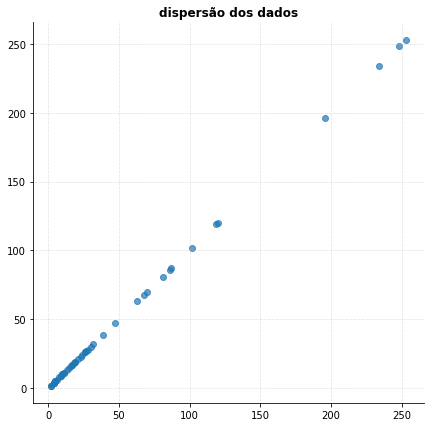

In [ ]:
plt.figure(figsize=(7,7))
plt.grid(color="0.7", linestyle=":", linewidth=0.5)

plt.scatter(img_k[:,100], img_k[:,100], marker="o", alpha=0.7)
plt.title("dispersão dos dados", fontweight="bold")

sns.despine()

In [ ]:
K = 50
k_means = KMeans(n_clusters=K)

In [ ]:
k_means.fit(img_k)

KMeans(n_clusters=50)

## Predict

In [ ]:
files = [file for file in glob.glob('Projeto/Fotos/size/*.png')]
files = [file.replace('\\', '/') for file in files]
files.sort()

dataset = []
for file in files:
    img = cv2.imread(file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dataset.append(img_gray)

In [ ]:
img_h_arr = np.asarray(dataset)
img_h = img_h_arr.reshape(img_h_arr.shape[0], -1)
img_h.shape

(4679, 262144)

In [ ]:
agrupamento = k_means.predict(img_h)


In [ ]:
print(agrupamento)

[49 47 49 47 49 49 46 46 19 16 16 49 49 49 16 49 45 49 46 49 45  3  7 49
  7 45 36 49 49 49 49 49 49 49 49 49 46 46 46 49 49 49 49 49 49 49 49 49
 49 49 49 47 47 49 49 49 49  3  3 36 36 36 45 45  1  1 49  0  3 46 46 46
 43  2  8  8  8 46 49 12 12 46 36 16 20 16  9  9  9 43 43  8  8  8  8 47
 44 49 42 44 49 49 49  5  9 16  8  8 36 36 36  8  9  8  9 46 46 46 46 16
 49 49 46 46 49 46 46 46 46 12 12 49  8 12  3 46 46 49 46 49  2 49  3 46
 16 16 44 49 49 43 12 12 12  8  9  9 49 15  9 36  8 49 49 47 47 49 46 46
 36  8  8 46 46 46 49 36 36 12 46 46 49 47 47 46 46 47 46 49 49 46 46 46
 46 49 46 36 49 49 49 49  7  7 49 49 49 49 46 46  8  8  9  8  9  8 46 46
 12 36  3 12 12 12 46 46 46 45  3 38 12 46  3 46 46 46 46 46  7  7 46 12
 45 46 45 12 12 45 46 46 46 46 46 45 46 46 46 46 46 46 46 46 46 46 12 46
 46 45 46 46 49 49 49 12 49 49 49 46 49 12 46 47  1  7 12 47 46 12 36 46
 46 46 46 46 46 12 12 12 12 45 12 12  1 12  3 12 12 12 12  9 12 12 12 12
 12 12 12 46  7 47 12 12 12 45 12 12 12 12  3 12 12

In [ ]:
for k, i in enumerate(agrupamento):
    if i == 0:
        print(f"K =: {i}   esta na posição{k}")

K =: 0   esta na posição67
K =: 0   esta na posição340
K =: 0   esta na posição352
K =: 0   esta na posição405
K =: 0   esta na posição2055
K =: 0   esta na posição2317
K =: 0   esta na posição2319
K =: 0   esta na posição2339
K =: 0   esta na posição2354
K =: 0   esta na posição2355
K =: 0   esta na posição2461
K =: 0   esta na posição2476
K =: 0   esta na posição2504
K =: 0   esta na posição2511
K =: 0   esta na posição2515
K =: 0   esta na posição2577
K =: 0   esta na posição2582
K =: 0   esta na posição2595
K =: 0   esta na posição2663
K =: 0   esta na posição2668
K =: 0   esta na posição2696
K =: 0   esta na posição2803
K =: 0   esta na posição2807
K =: 0   esta na posição2927
K =: 0   esta na posição3051
K =: 0   esta na posição3052
K =: 0   esta na posição3398
K =: 0   esta na posição3420
K =: 0   esta na posição3421
K =: 0   esta na posição3437
K =: 0   esta na posição3456
K =: 0   esta na posição3468
K =: 0   esta na posição3477
K =: 0   esta na posição3516
K =: 0   esta na po

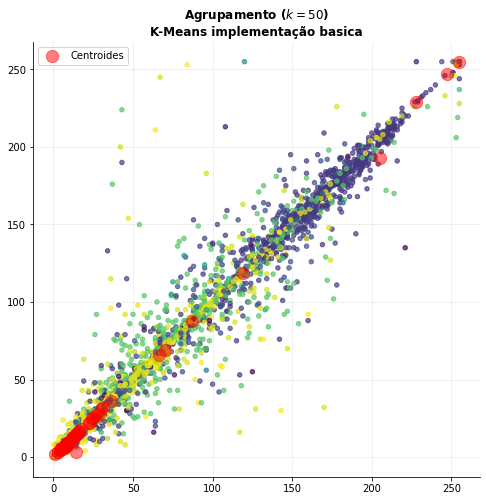

In [ ]:
plt.figure(figsize=(8,8))

plt.grid(color="0.7", linestyle=":", linewidth=0.5)

plt.scatter(img_h[:,0], img_h[:,1], c=agrupamento, s=20, cmap="viridis", alpha=0.7)

centers = k_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=150, alpha=0.5, label="Centroides")

plt.title("Agrupamento ($k=50$)\nK-Means implementação basica", fontweight="bold")

plt.legend()
sns.despine()

In [ ]:
files = [file for file in glob.glob('Projeto/Fotos/H/*/*.jpg')]

files = [file.replace('\\', '/') for file in files]
files

['Projeto/Fotos/H/00/OS030822_B0001.JPG',
 'Projeto/Fotos/H/00/OS030822_B0002.JPG',
 'Projeto/Fotos/H/00/OS030822_B0003.JPG',
 'Projeto/Fotos/H/00/OS030822_B0004.JPG',
 'Projeto/Fotos/H/00/OS030822_B0005.JPG',
 'Projeto/Fotos/H/00/OS030822_B0006.JPG',
 'Projeto/Fotos/H/00/OS030822_B0007.JPG',
 'Projeto/Fotos/H/00/OS030822_B0008.JPG',
 'Projeto/Fotos/H/00/OS030822_B0009.JPG',
 'Projeto/Fotos/H/00/OS030822_B0010.JPG',
 'Projeto/Fotos/H/00/OS030822_B0011.JPG',
 'Projeto/Fotos/H/00/OS030822_B0012.JPG',
 'Projeto/Fotos/H/00/OS030822_B0013.JPG',
 'Projeto/Fotos/H/00/OS030822_B0014.JPG',
 'Projeto/Fotos/H/00/OS030822_B0015.JPG',
 'Projeto/Fotos/H/00/OS030822_B0016.JPG',
 'Projeto/Fotos/H/00/OS030822_B0017.JPG',
 'Projeto/Fotos/H/00/OS030822_B0018.JPG',
 'Projeto/Fotos/H/00/OS030822_B0019.JPG',
 'Projeto/Fotos/H/00/OS030822_B0020.JPG',
 'Projeto/Fotos/H/00/OS030822_B0021.JPG',
 'Projeto/Fotos/H/00/OS030822_B0022.JPG',
 'Projeto/Fotos/H/00/OS030822_B0023.JPG',
 'Projeto/Fotos/H/00/OS030822_B002

In [ ]:
labels = []
dataset = []
for i, file in enumerate(h_kmeans):
    
    img = cv2.imread(file) ### ler a imagem
        
    img_512 = cv2.resize(img,(512, 512),interpolation=cv2.INTER_AREA)
        
    img = cv2.cvtColor(img_512, cv2.COLOR_BGR2RGB)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    dataset.append(img_gray)
       
    label = file.split(sep='/')[3]
    print(label)    
    
    name = file.split(sep='/')[-1]
    print(name)    
    
    cv2.imwrite(f'Projeto/' + label + '/' + name + '.png', img_gray)
    labels.append(label)

OS030822_A4680.JPG
OS030822_A4680.JPG
OS030822_A4681.JPG
OS030822_A4681.JPG
OS030822_A4682.JPG
OS030822_A4682.JPG
OS030822_A4683.JPG
OS030822_A4683.JPG
OS030822_A4684.JPG
OS030822_A4684.JPG
OS030822_A4685.JPG
OS030822_A4685.JPG
OS030822_A4686.JPG
OS030822_A4686.JPG
OS030822_A4687.JPG
OS030822_A4687.JPG
OS030822_A4688.JPG
OS030822_A4688.JPG
OS030822_A4689.JPG
OS030822_A4689.JPG
OS030822_A4690.JPG
OS030822_A4690.JPG
OS030822_A4691.JPG
OS030822_A4691.JPG
OS030822_A4692.JPG
OS030822_A4692.JPG
OS030822_A4693.JPG
OS030822_A4693.JPG
OS030822_A4694.JPG
OS030822_A4694.JPG
OS030822_A4695.JPG
OS030822_A4695.JPG
OS030822_A4696.JPG
OS030822_A4696.JPG
OS030822_A4697.JPG
OS030822_A4697.JPG
OS030822_A4698.jpg
OS030822_A4698.jpg
OS030822_A4699.jpg
OS030822_A4699.jpg
OS030822_A4700.jpg
OS030822_A4700.jpg
OS030822_A4701.jpg
OS030822_A4701.jpg
OS030822_A4702.jpg
OS030822_A4702.jpg
OS030822_A4703.jpg
OS030822_A4703.jpg
OS030822_A4704.jpg
OS030822_A4704.jpg
OS030822_A4705.jpg
OS030822_A4705.jpg
OS030822_A47

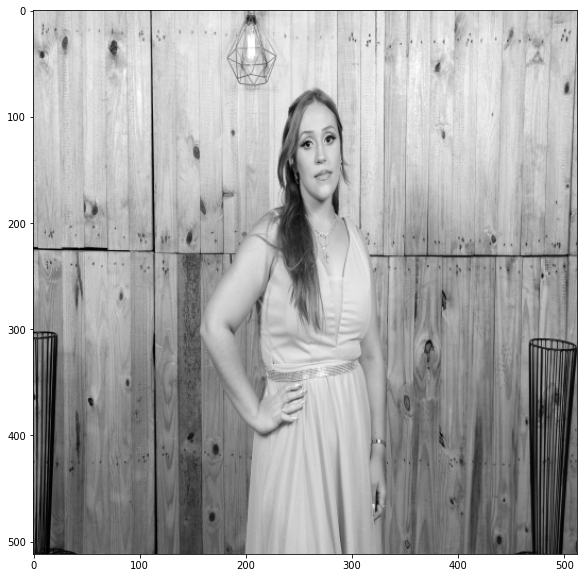

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(dataset[1000], cmap='gray')

In [ ]:
labels

['00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.33, stratify=labels, random_state=42)

X_train = np.asarray(X_train)

X_test = np.asarray(X_test)

print('tamanho do dataset de treino:', X_train.shape)

print('tamanho do dataset de teste:', X_test.shape)

tamanho do dataset de treino: (3134, 512, 512)
tamanho do dataset de teste: (1545, 512, 512)


11


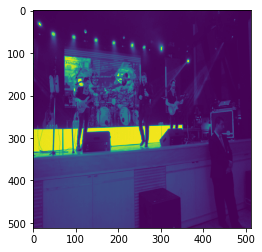

In [ ]:
plt.imshow(X_train[4]);
print(y_train[4])

In [ ]:
X_train_rf = X_train.reshape(X_train.shape[0], -1)

X_test_rf = X_test.reshape(X_test.shape[0], -1)

print(X_train_rf.shape)
print(X_test_rf.shape)

(3134, 262144)
(1545, 262144)


In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train_rf, y_train) 

y_pred_rf = clf.predict(X_test_rf)

y_pred_train = clf.predict(X_train_rf)

In [ ]:
print(classification_report(y_train, y_pred_train ))
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          00       1.00      1.00      1.00       144
          01       1.00      1.00      1.00      1185
          02       1.00      1.00      1.00       638
          03       1.00      1.00      1.00       282
          04       1.00      1.00      1.00        74
          05       1.00      1.00      1.00       291
          06       1.00      1.00      1.00        74
          07       1.00      1.00      1.00       114
          08       1.00      1.00      1.00        22
          09       1.00      1.00      1.00        88
          11       1.00      1.00      1.00       222

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134

              precision    recall  f1-score   support

          00       0.78      0.10      0.17        71
          01       0.76      0.95      0.85       584
          02       0.58 

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[  7,  26,  34,   1,   0,   2,   0,   1,   0,   0,   0],
       [  0, 557,  23,   1,   0,   1,   0,   0,   0,   0,   2],
       [  0,  30, 280,   1,   0,   3,   0,   1,   0,   0,   0],
       [  0,  12,   6, 118,   0,   3,   0,   0,   0,   0,   0],
       [  1,   7,   7,   4,  15,   3,   0,   0,   0,   0,   0],
       [  1,  56,  51,   6,   0,  28,   0,   1,   0,   0,   1],
       [  0,  11,  16,   1,   0,   3,   4,   0,   0,   0,   1],
       [  0,   6,   4,   0,   0,   0,   0,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,   0,   0],
       [  0,   3,  32,   0,   0,   1,   0,   1,   0,   5,   1],
       [  0,  26,  29,   2,   0,   5,   0,   0,   0,   0,  48]],
      dtype=int64)

<Figure size 720x720 with 0 Axes>

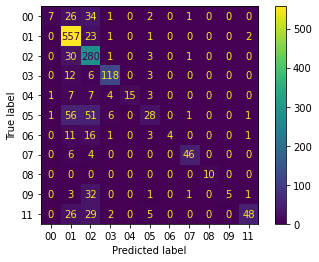

In [ ]:

plt.figure(figsize=[10, 10])

fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

plt.show(fig)

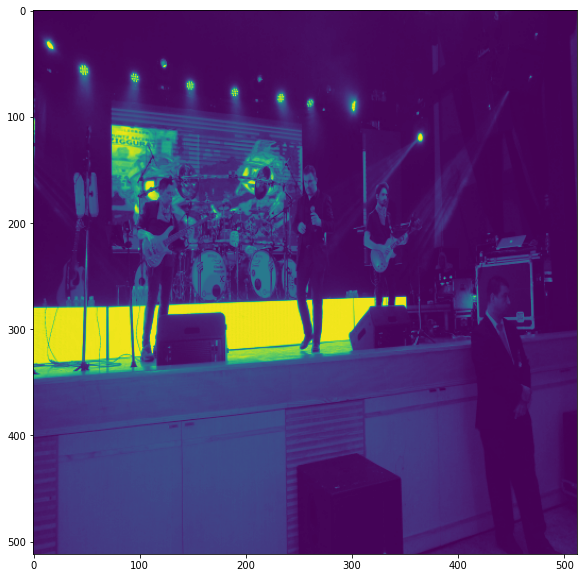

In [ ]:
img_256 = X_train[4]

#img_512 = cv2.resize(teste,(512, 512),interpolation=cv2.INTER_AREA)

plt.figure(figsize=[10, 10])

plt.imshow(img_256);

In [ ]:
print(labels)

In [ ]:
plt.imshow(labels[0])

In [ ]:
clusterização

dlib

template matching